In [11]:
# Importing all modules
import pandas as pd
# Settings for pandsa
pd.set_option('display.max_rows', None)

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import f_oneway

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

import joblib

## Gold ETF Adjusted Closing Price Prediction
In this project, we aim to predict the future adjusted closing price of the Gold ETF (Exchange-Traded Fund) using historical data and various financial indicators. We will perform data analysis, preprocessing, feature selection, and apply multiple regression algorithms to build predictive models. Finally, we will select the best-performing model based on evaluation metrics.

### Step 1: Reading the Dataset
Using the pandas package, we read the dataset from a CSV file, remove duplicates, and print sample data for inspection.

In [12]:
# Read the dataset
df = pd.read_csv('FINAL_USO.csv')

# Remove duplicates
df = df.drop_duplicates()

# Print sample data for initial inspection
print(df.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2011-12-15  154.740005  154.949997  151.710007  152.330002  152.330002   
1  2011-12-16  154.309998  155.369995  153.899994  155.229996  155.229996   
2  2011-12-19  155.479996  155.860001  154.360001  154.869995  154.869995   
3  2011-12-20  156.820007  157.429993  156.580002  156.979996  156.979996   
4  2011-12-21  156.979996  157.529999  156.130005  157.160004  157.160004   

     Volume     SP_open     SP_high      SP_low  ...    GDX_Low  GDX_Close  \
0  21521900  123.029999  123.199997  121.989998  ...  51.570000  51.680000   
1  18124300  122.230003  122.949997  121.300003  ...  52.040001  52.680000   
2  12547200  122.059998  122.320000  120.029999  ...  51.029999  51.169998   
3   9136300  122.180000  124.139999  120.370003  ...  52.369999  52.990002   
4  11996100  123.930000  124.360001  122.750000  ...  52.419998  52.959999   

   GDX_Adj Close  GDX_Volume   USO_Open   USO_High    USO_Low  USO_C

### Step 2: Problem Statement Definition
We define the problem by examining the data's shape, size, and attributes. Our goal is to predict the Adjusted Close price of the Gold ETF.

In [13]:
# Check the shape of the dataset to get number of rows and columns
print("Dataset shape:", df.shape)

# Display the columns in the dataset
print("\nDataset columns:")
print(df.columns.tolist())

# Define the target variable
target_variable = 'Adj Close'
print(f"\nTarget Variable: {target_variable}")

Dataset shape: (1718, 81)

Dataset columns:
['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume', 'DJ_open', 'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume', 'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume', 'EU_Price', 'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price', 'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price', 'OS_Open', 'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open', 'SF_High', 'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open', 'USB_High', 'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High', 'PLT_Low', 'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low', 'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High', 'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High', 'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open', 'USO_High', 'USO_Low', 'USO_Close', 'USO_Adj Close', 'USO_Vol

### Step 3: Visualizing the Distribution of Target Variable
We visualize the distribution of the target variable to assess class imbalance or skewness.

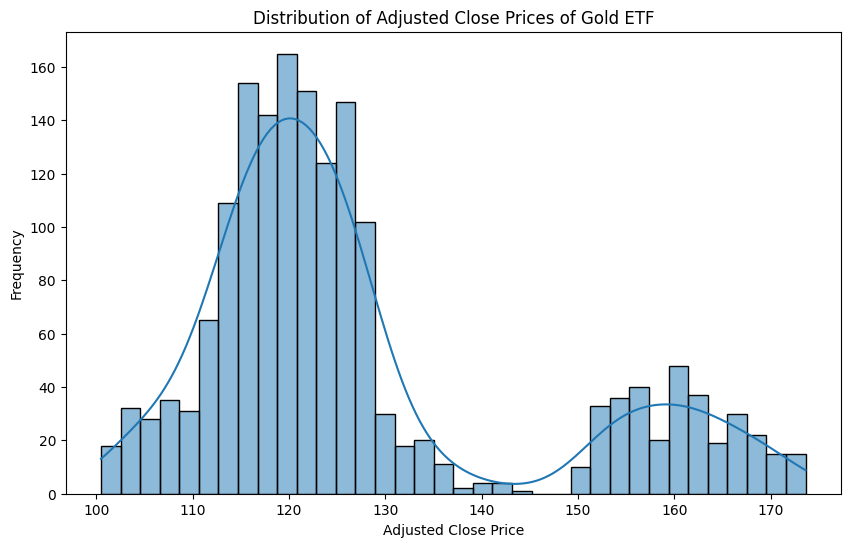

In [14]:
# Plot the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['Adj Close'], kde=True)
plt.title('Distribution of Adjusted Close Prices of Gold ETF')
plt.xlabel('Adjusted Close Price')
plt.ylabel('Frequency')
plt.show()

### Step 4: Data Exploration at Basic Level
We explore the data to identify quantitative and categorical columns and remove unwanted columns.

In [15]:
# Check data types of each column
print(df.dtypes)

# Identify quantitative columns (numerical data)
quantitative_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print("\nQuantitative columns:")
print(quantitative_columns)

# Identify categorical columns (object data type)
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print("\nCategorical columns:")
print(categorical_columns)

# Remove unwanted columns (if any)
# For this dataset, we'll keep all columns for now

Date              object
Open             float64
High             float64
Low              float64
Close            float64
Adj Close        float64
Volume             int64
SP_open          float64
SP_high          float64
SP_low           float64
SP_close         float64
SP_Ajclose       float64
SP_volume          int64
DJ_open          float64
DJ_high          float64
DJ_low           float64
DJ_close         float64
DJ_Ajclose       float64
DJ_volume          int64
EG_open          float64
EG_high          float64
EG_low           float64
EG_close         float64
EG_Ajclose       float64
EG_volume          int64
EU_Price         float64
EU_open          float64
EU_high          float64
EU_low           float64
EU_Trend           int64
OF_Price         float64
OF_Open          float64
OF_High          float64
OF_Low           float64
OF_Volume          int64
OF_Trend           int64
OS_Price         float64
OS_Open          float64
OS_High          float64
OS_Low           float64


### Step 5: Visual Exploratory Data Analysis (EDA)
We visualize distributions of predictor variables using histograms for quantatative variables and bar charts for categorical variables.

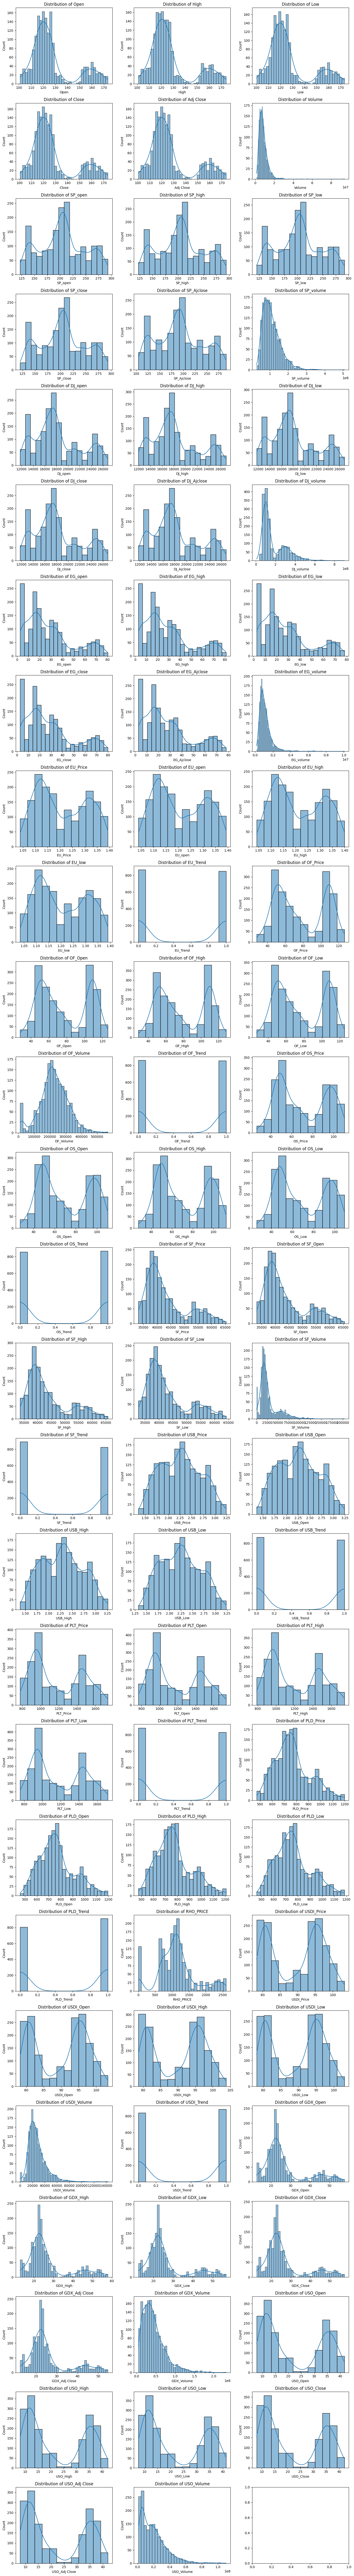

In [16]:
# Plotting the distribution of each quantitative column/feature
num_quant_cols = len(quantitative_columns)
num_cols = 3  # Number of plots per row
num_rows = int(np.ceil(num_quant_cols / num_cols))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows*4))

for i, col in enumerate(quantitative_columns):
    row = i // num_cols
    col_pos = i % num_cols
    sns.histplot(df[col], ax=axes[row, col_pos], kde=True)
    axes[row, col_pos].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

### Step 6: Outlier Analysis
We identify and handle outliers in the data to improve model performance.

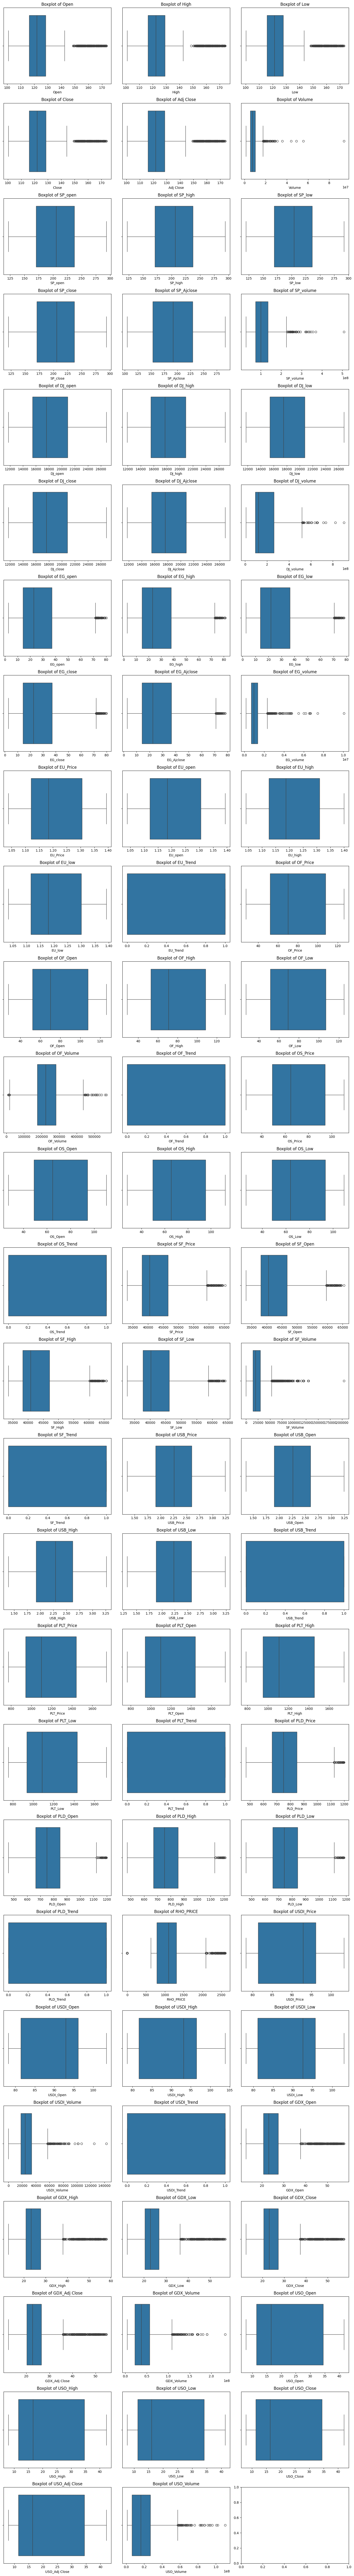

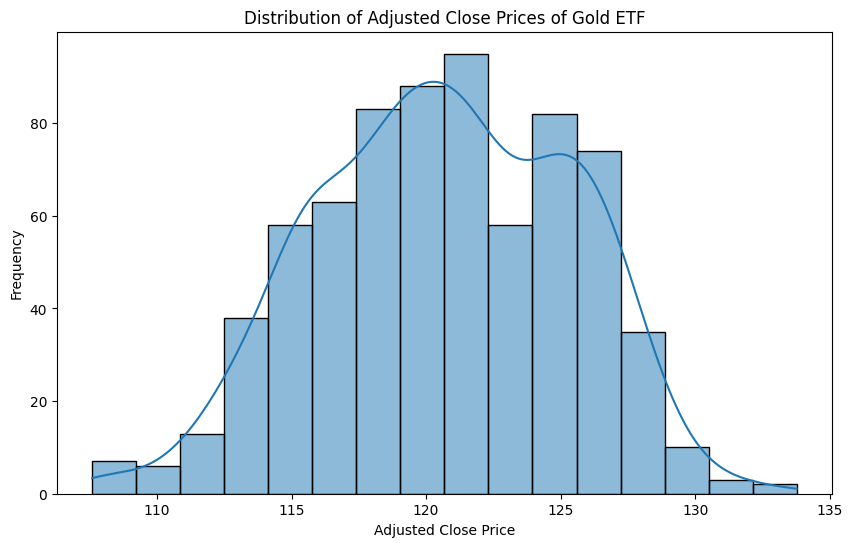

1003 1718


In [17]:
# Using box plots to identify outliers using visual analysis
num_rows = int(np.ceil(num_quant_cols / num_cols))
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
axes = axes.flatten()
for i, col in enumerate(quantitative_columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Make a copy of the dataframe
original_df = df.copy()

# Removal of outliers using the IQR method
for col in quantitative_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter out outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Plot the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['Adj Close'], kde=True)
plt.title('Distribution of Adjusted Close Prices of Gold ETF')
plt.xlabel('Adjusted Close Price')
plt.ylabel('Frequency')
plt.show()

# Counting the number of removed data points
removed_data_points = len(original_df) - len(df)

print(removed_data_points, len(original_df))

### Step 7: Missing Values Analysis
We analyze and treat missing values using appropriate strategies.

In [18]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])


# For continuous variables, fill with median
for col in quantitative_columns:
    if df[col].isnull().sum() > 0:
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)


# Verify that there are no more missing values
print("Missing values after fill:")
print(df.isnull().sum().sum())

Missing values in each column:
Series([], dtype: int64)
Missing values after fill:
0


### Step 8: Feature Selection - Correlation Analysis
We perform correlation analysis to select the best continuous predictors.

Correlation of predictors with the target variable:
Close            1.000000
Adj Close        1.000000
High             0.997141
Low              0.996811
Open             0.993136
GDX_Low          0.798461
GDX_Close        0.795274
GDX_Open         0.790904
GDX_High         0.790446
GDX_Adj Close    0.784665
SF_Low           0.620776
SF_Price         0.618808
SF_Open          0.615633
SF_High          0.613684
EU_low           0.612234
EU_Price         0.611568
EU_high          0.608378
EU_open          0.607633
OS_Low           0.480203
OS_Price         0.479697
OS_Open          0.476811
OS_High          0.474881
OF_Low           0.466835
OF_Price         0.465565
OF_Open          0.462843
OF_High          0.460703
PLT_Low          0.417516
PLT_Price        0.417441
PLT_Open         0.413801
PLT_High         0.413749
USO_Low          0.367768
USO_Adj Close    0.366138
USO_Close        0.366138
USO_Open         0.365055
USO_High         0.363158
PLD_Price        0.266340
PLD_Open    

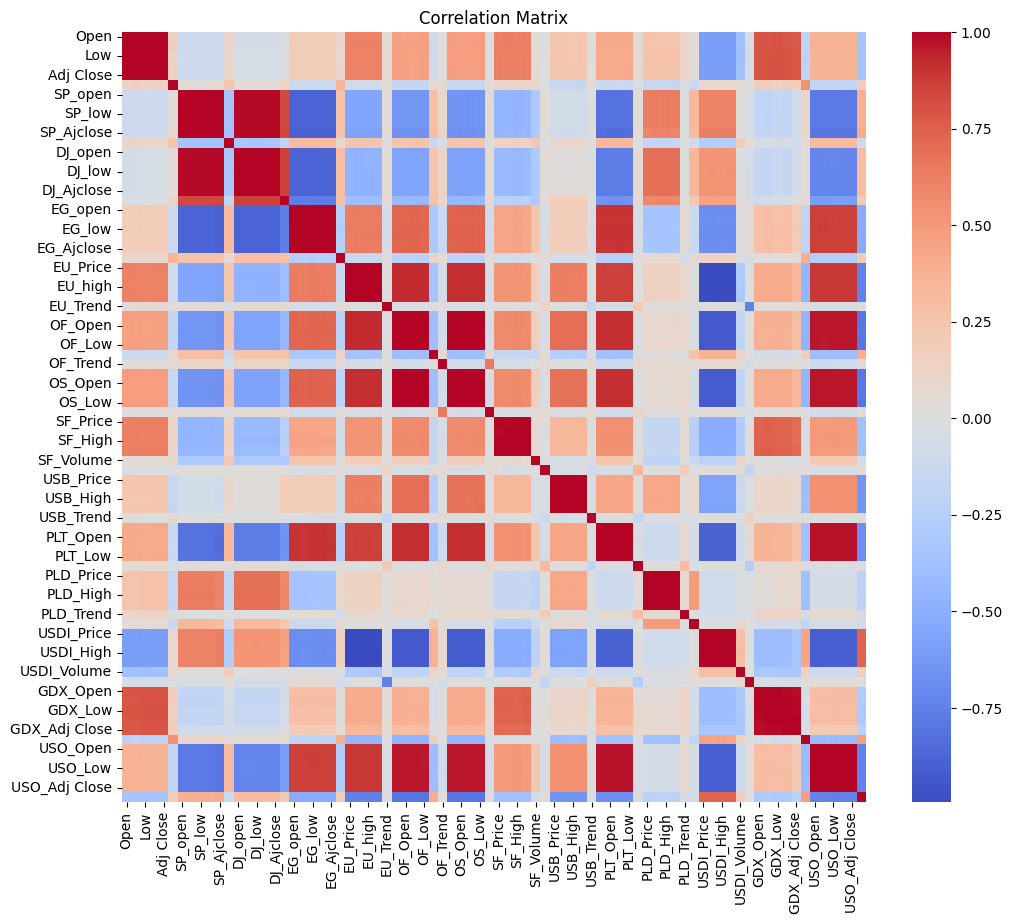

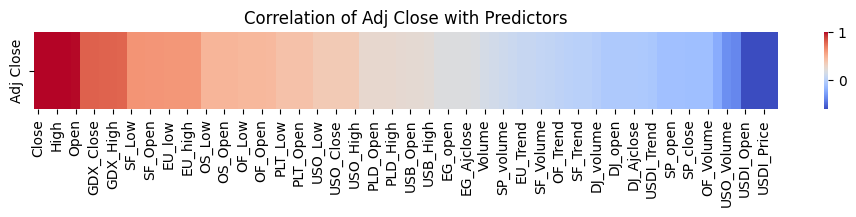

Index(['High', 'Low', 'Open', 'GDX_Low', 'GDX_Close', 'GDX_Open', 'GDX_High',
       'GDX_Adj Close', 'SF_Low', 'SF_Price', 'SF_Open', 'SF_High', 'EU_low',
       'EU_Price', 'EU_high', 'EU_open', 'OS_Low', 'OS_Price', 'OS_Open',
       'OS_High', 'OF_Low', 'OF_Price', 'OF_Open', 'OF_High', 'PLT_Low',
       'PLT_Price', 'PLT_Open', 'PLT_High', 'USO_Low', 'USO_Adj Close',
       'USO_Close', 'USO_Open', 'USO_High', 'PLD_Price', 'PLD_Open', 'PLD_Low',
       'PLD_High', 'USB_Low', 'USB_Open', 'USB_Price', 'USB_High', 'EG_low',
       'EG_open', 'EG_close', 'EG_Ajclose', 'EG_high', 'Volume', 'PLD_Trend',
       'SP_volume', 'EG_volume', 'EU_Trend', 'PLT_Trend', 'SF_Volume',
       'RHO_PRICE', 'OF_Trend', 'OS_Trend', 'SF_Trend', 'USB_Trend',
       'DJ_volume', 'DJ_high', 'DJ_open', 'DJ_close', 'DJ_Ajclose', 'DJ_low',
       'USDI_Trend', 'SP_high', 'SP_open', 'SP_Ajclose', 'SP_close', 'SP_low',
       'OF_Volume', 'GDX_Volume', 'USO_Volume', 'USDI_Volume', 'USDI_Open',
       'USDI_Low'

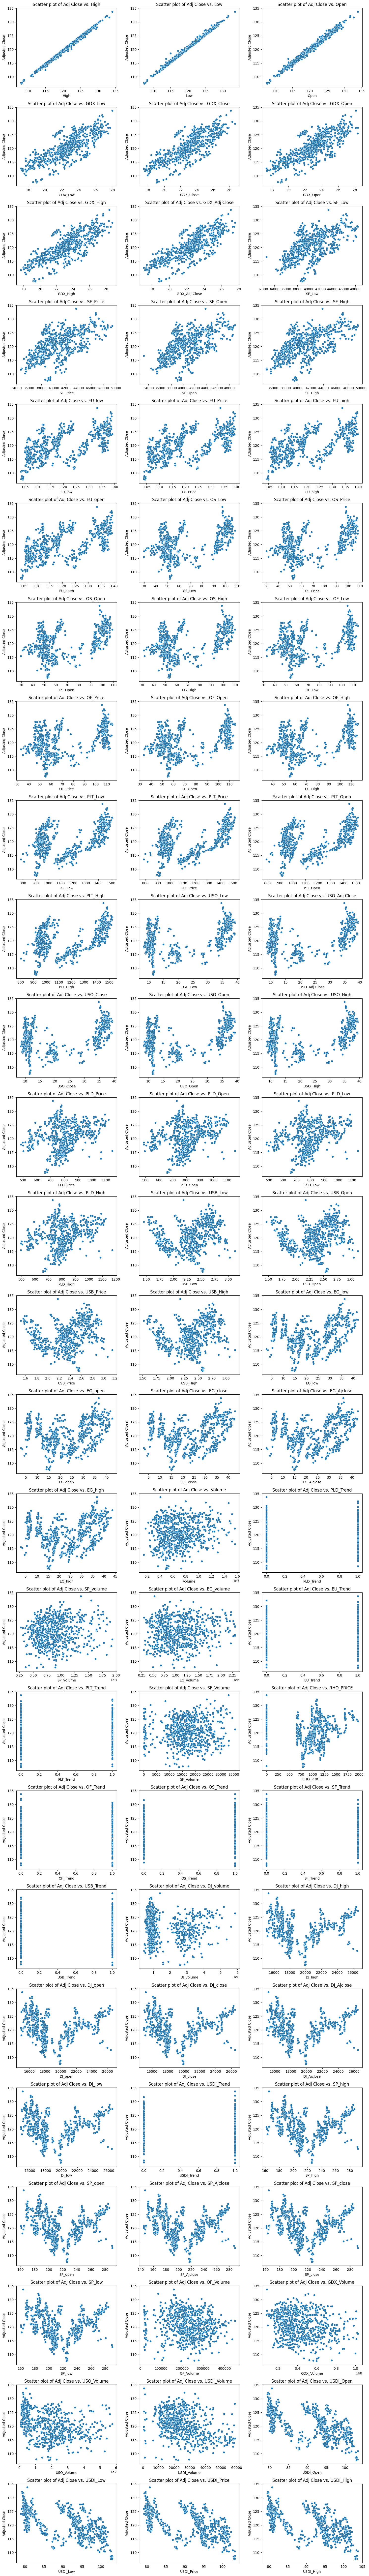

In [19]:
# Calculate the correlation matrix
corr_matrix = df[quantitative_columns].corr()

# Extract the correlation values between the target variable and predictors
target_correlations = corr_matrix['Adj Close'].sort_values(ascending=False)
print("Correlation of predictors with the target variable:")
print(target_correlations)


# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix')
plt.show()

# Visualize only correlations with 'Adj Close' in a separate heatmap
plt.figure(figsize=(12, 1))  
sns.heatmap(target_correlations.to_frame().T, cmap='coolwarm', annot=False)
plt.title('Correlation of Adj Close with Predictors')
plt.show()

# Scatter plots of top correlated features with the target variable. also printing full list
top_features = target_correlations.index[2:]  # Exclude 'Adj Close' and 'Close' itself
print(top_features)

# Setup the grid for scatter plots
num_features = len(top_features)
num_rows = int(np.ceil(num_features / num_cols))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
axes = axes.flatten() 

for i, feature in enumerate(top_features):
    sns.scatterplot(x=df[feature], y=df['Adj Close'], ax=axes[i])
    axes[i].set_title(f'Scatter plot of Adj Close vs. {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Adjusted Close')

plt.tight_layout()
plt.show()

### Step 9: Statistical Feature Selection Using ANOVA + Adding Lags
We would perform ANOVA tests to check relationships between categorical predictors and the continuous target variable. Also creating lagged features for greater accuracy in models.

In [20]:
# Anova test is not needed as there are no significant categorical predictors.

# LAGS:
# Define the number of lags
num_lags = 10  # Adjust as needed

# Create lagged features for 'Adj Close' (target)
for lag in range(1, num_lags + 1):
    df[f'Adj_Close_Lag_{lag}'] = df['Adj Close'].shift(lag)

# Remove rows with no values resulting from the lagging
df = df.dropna().reset_index(drop=True)

# Update the list of quantitative columns
quantitative_columns += [f'Adj_Close_Lag_{i}' for i in range(1, num_lags + 1)]

### Step 10: Selecting Final Predictors
Based on the analysis, we select the final set of features for modeling.

In [21]:
# Select features with high correlation with the target var
threshold = 0.6
selected_features = target_correlations[abs(target_correlations) > threshold].index.tolist()

# Remove the target variable from the list alongside related variables
for feature in ['Adj Close', 'Close', 'High', 'Low', 'Open']:
    if feature in selected_features:
        selected_features.remove(feature)

# Add lagged features to the selected features
selected_features += [f'Adj_Close_Lag_{i}' for i in range(1, num_lags + 1)]

# Remove any duplicates if necessary
selected_features = list(set(selected_features))

print("Selected features for the model:")
print(selected_features)

Selected features for the model:
['GDX_Close', 'EU_high', 'GDX_High', 'Adj_Close_Lag_2', 'EU_open', 'GDX_Adj Close', 'USDI_High', 'Adj_Close_Lag_6', 'EU_Price', 'GDX_Open', 'EU_low', 'Adj_Close_Lag_4', 'SF_Open', 'SF_High', 'Adj_Close_Lag_8', 'Adj_Close_Lag_9', 'Adj_Close_Lag_3', 'Adj_Close_Lag_7', 'SF_Low', 'Adj_Close_Lag_10', 'SF_Price', 'GDX_Low', 'Adj_Close_Lag_5', 'Adj_Close_Lag_1']


### Step 11: Data Conversion to Numeric Values
Since we aren't using categorical values for this prediction, we can skip this step. If we had categorical features, we would encode them.

since we have no significant categorical features, we proceed with the selected features.

### Step 12: Train/Test Data Split and Standardization
We split the data into training and testing sets and standardize the features.

In [22]:
# Define the model
df_model = df[selected_features + ['Adj Close']]
# Separate features and target variable
X = df_model.drop('Adj Close', axis=1)
y = df_model['Adj Close']

# Split the data into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Standardise/Scale the features
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Step 13: Investigating Multiple Regression Algorithms
We build models using various regression algorithms and evaluate their performance.

In [23]:
# init dictionaries to store results and predictions
results = {}
each_model_predictions = {}

# Train and evaluate Linear Regression
linear_reg = LinearRegression()
print('Training Linear Regression...')
linear_reg.fit(X_train_scaled, y_train)
y_pred_lr = linear_reg.predict(X_test_scaled)
each_model_predictions['Linear Regression'] = y_pred_lr

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
results['Linear Regression'] = {'MSE': mse_lr, 'R2 Score': r2_lr}

# Train and evaluate Decision Tree
decision_tree = DecisionTreeRegressor(random_state=42)
print('Training Decision Tree...')
decision_tree.fit(X_train_scaled, y_train)
y_pred_dt = decision_tree.predict(X_test_scaled)
each_model_predictions['Decision Tree'] = y_pred_dt

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
results['Decision Tree'] = {'MSE': mse_dt, 'R2 Score': r2_dt}

# Train and evaluate Random Forest
random_forest = RandomForestRegressor(random_state=42)
print('Training Random Forest...')
random_forest.fit(X_train_scaled, y_train)
y_pred_rf = random_forest.predict(X_test_scaled)
each_model_predictions['Random Forest'] = y_pred_rf

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
results['Random Forest'] = {'MSE': mse_rf, 'R2 Score': r2_rf}

# Train and evaluate XGBoost
xgboost = XGBRegressor(random_state=42, objective='reg:squarederror')
print('Training XGBoost...')
xgboost.fit(X_train_scaled, y_train)
y_pred_xgb = xgboost.predict(X_test_scaled)
each_model_predictions['XGBoost'] = y_pred_xgb

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
results['XGBoost'] = {'MSE': mse_xgb, 'R2 Score': r2_xgb}

# Train and evaluate K-Nearest Neighbors
knn = KNeighborsRegressor()
print('Training K-Nearest Neighbors...')
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
each_model_predictions['KNN'] = y_pred_knn

mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
results['KNN'] = {'MSE': mse_knn, 'R2 Score': r2_knn}

# Train and evaluate Support Vector Regressor
svr = SVR()
print('Training Support Vector Regressor...')
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)
each_model_predictions['SVR'] = y_pred_svr

mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
results['SVR'] = {'MSE': mse_svr, 'R2 Score': r2_svr}

# Print all results at the end (MSE to 2sf and R2 to 4SF)
print("All Model Results:")
for model_name, metrics in results.items():
    print(f"{model_name} - MSE: {metrics['MSE']:.2f}, R2 Score: {metrics['R2 Score']:.4f}")


Training Linear Regression...
Training Decision Tree...
Training Random Forest...
Training XGBoost...
Training K-Nearest Neighbors...
Training Support Vector Regressor...
All Model Results:
Linear Regression - MSE: 0.87, R2 Score: 0.8983
Decision Tree - MSE: 5.37, R2 Score: 0.3732
Random Forest - MSE: 2.18, R2 Score: 0.7460
XGBoost - MSE: 3.51, R2 Score: 0.5907
KNN - MSE: 11.96, R2 Score: -0.3960
SVR - MSE: 8.80, R2 Score: -0.0266


### Step 14: Selection of the Best Model
We select the best model based on evaluation metrics.

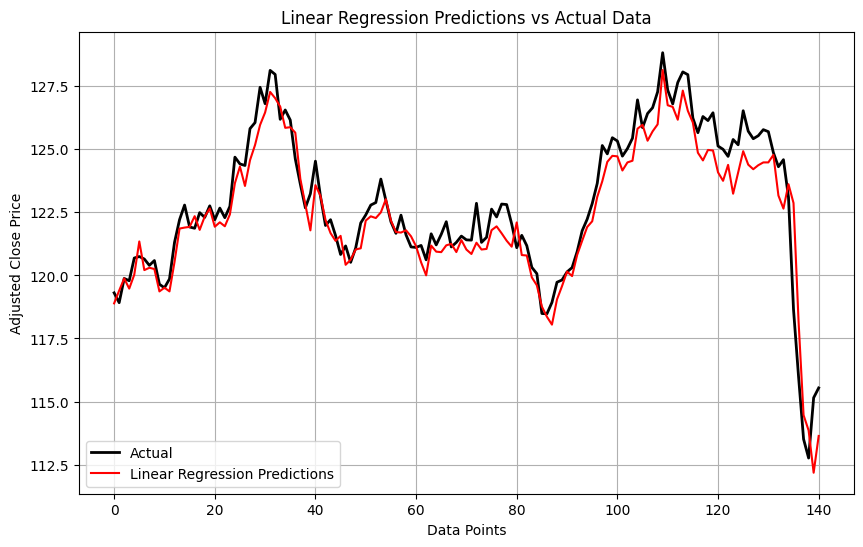

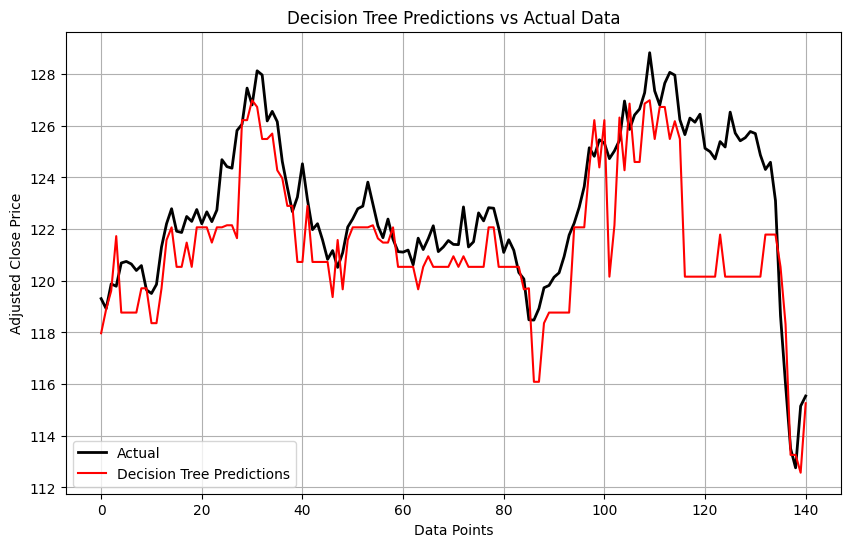

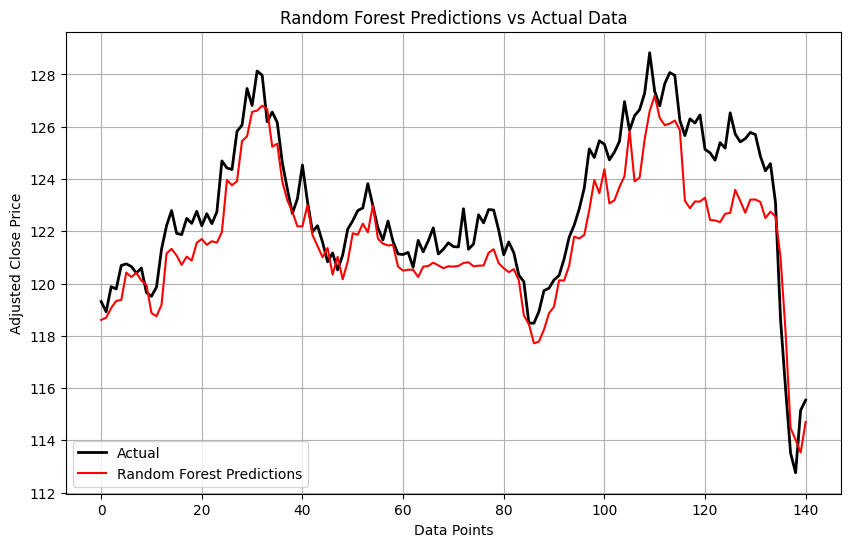

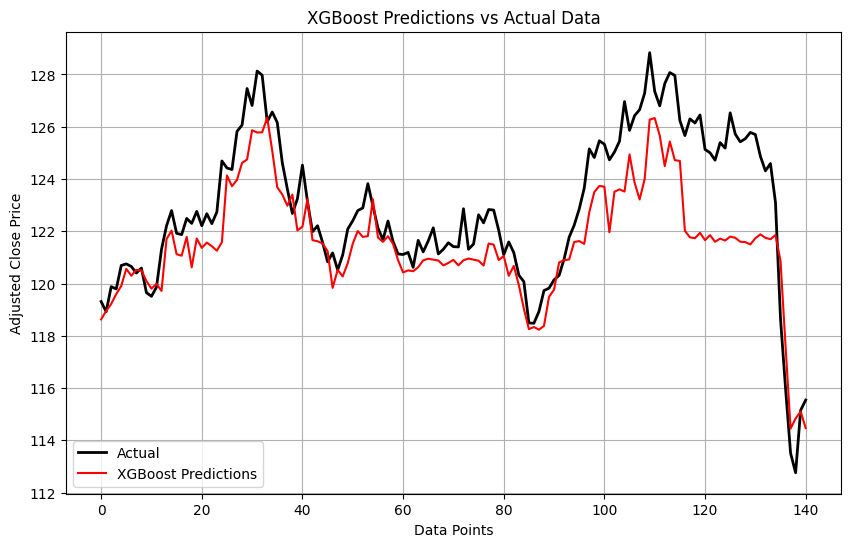

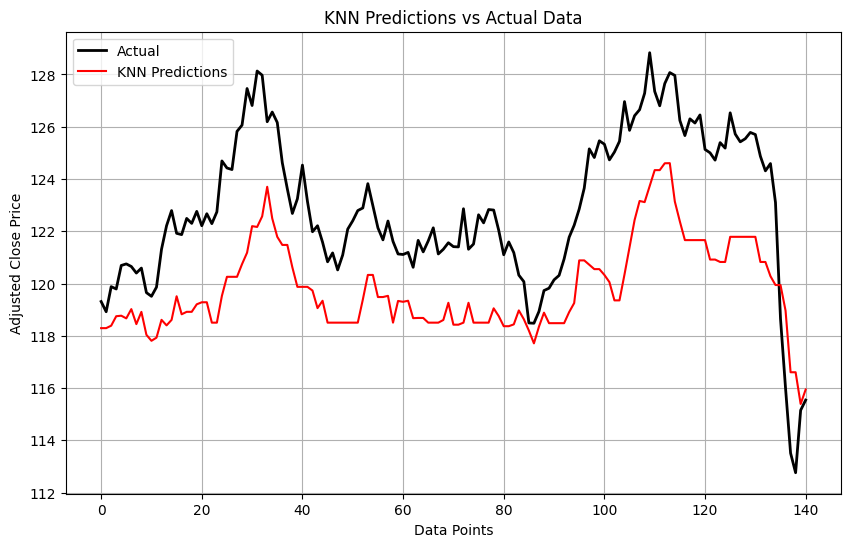

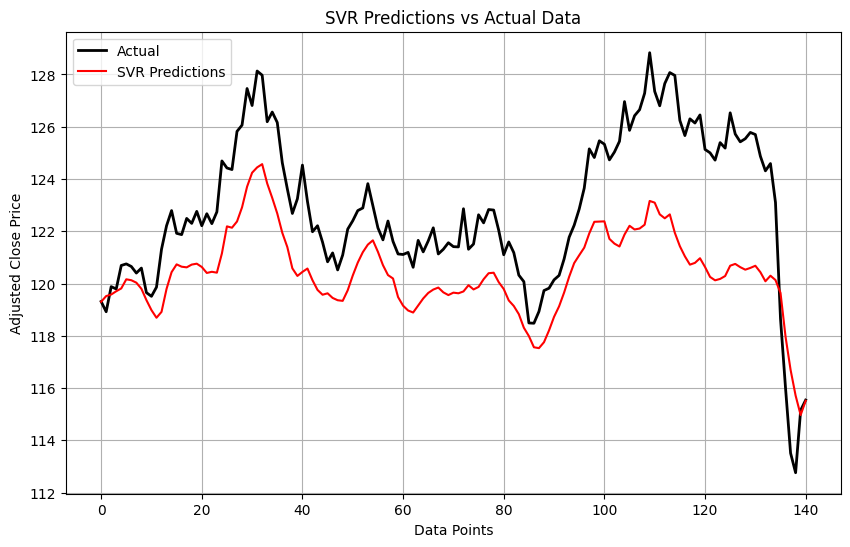

Model Performance:
Linear Regression - MSE: 0.87, R2 Score: 0.8983
Decision Tree - MSE: 5.37, R2 Score: 0.3732
Random Forest - MSE: 2.18, R2 Score: 0.7460
XGBoost - MSE: 3.51, R2 Score: 0.5907
KNN - MSE: 11.96, R2 Score: -0.3960
SVR - MSE: 8.80, R2 Score: -0.0266


In [24]:
# Create a separate plot for each model
for name, y_pred in each_model_predictions.items():
    plt.figure(figsize=(10, 6))

    # Plot the actual values
    plt.plot(y_test.values, label="Actual", color='black', linewidth=2)

    # Plot the model's predictions
    plt.plot(y_pred, label=f'{name} Predictions', color='red')

    # Add title and labels
    plt.title(f'{name} Predictions vs Actual Data')
    plt.xlabel('Data Points')
    plt.ylabel('Adjusted Close Price')
    plt.legend()

    plt.grid(True)
    plt.show()

# Display the results
print("Model Performance:")
for name, metrics in results.items():
    print(f"{name} - MSE: {metrics['MSE']:.2f}, R2 Score: {metrics['R2 Score']:.4f}")



### Step 15: Retraining the model using 100% of the Data
I started with new variables so models can be created without depending on the rest of the notebook being run.

In [25]:
# Load Dataset
prod_df = pd.read_csv('FINAL_USO.csv')

# Data Cleaning
prod_df.drop_duplicates(inplace=True)
prod_df['Date'] = pd.to_datetime(prod_df['Date'])
prod_df.sort_values('Date', inplace=True)
prod_df.set_index('Date', inplace=True)

# Handle Missing Values
prod_df.ffill(inplace=True)
prod_df.bfill(inplace=True)

# Keep only the necessary columns
prod_df = prod_df[['Adj Close', 'GDX_Close', 'SF_Price']]

# Create Lagged Features for 'Adj Close'
for lag in range(1, 11):  # Creating lag1 to lag10
    prod_df[f'Adj_Close_lag_{lag}'] = prod_df['Adj Close'].shift(lag)

# Drop rows with NaN values created by lagging
prod_df.dropna(inplace=True)

# Define Features and Target
prod_features = ['GDX_Close', 'SF_Price'] + [f'Adj_Close_lag_{lag}' for lag in range(1, 11)]
prod_X = prod_df[prod_features]
prod_y = prod_df['Adj Close']

# Feature Scaling
prod_scaler = StandardScaler()
prod_X_scaled = prod_scaler.fit_transform(prod_X)

# Save the scaler for future use
joblib.dump(prod_scaler, 'prod_scaler.pkl')

# Retrain the Linear Regression model on 100% of the data
prod_model = LinearRegression()
prod_model.fit(prod_X_scaled, prod_y)

# Save the model to a file
joblib.dump(prod_model, 'prod_model.pkl')

# Save the last known features for use in predictions
prod_last_known_features = prod_df.iloc[-1][prod_features]
prod_last_known_features.to_pickle('prod_last_known_features.pkl')

print("Production model has been trained and saved successfully.")

Production model has been trained and saved successfully.
